<a href="https://colab.research.google.com/github/MitchMessier/BusinessAnalytics/blob/main/Lab4_Social_Media_EDA_Messier_Mitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/x_superbowl.csv', error_bad_lines=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Mounted at /content/gdrive


<ipython-input-2-b5dc83ed07c1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/x_superbowl.csv', error_bad_lines=False)
Skipping line 452: expected 39 fields, saw 55
Skipping line 937: expected 39 fields, saw 45
Skipping line 1184: expected 39 fields, saw 40
Skipping line 1633: expected 39 fields, saw 40
Skipping line 1864: expected 39 fields, saw 40
Skipping line 4949: expected 39 fields, saw 55
Skipping line 5197: expected 39 fields, saw 64
Skipping line 5885: expected 39 fields, saw 45
Skipping line 6371: expected 39 fields, saw 41
Skipping line 7883: expected 39 fields, saw 55
Skipping line 9896: expected 39 fields, saw 66
Skipping line 10967: expected 39 fields, saw 62
Skipping line 11318: expected 39 fields, saw 55
Skipping line 11578: expected 39 fields, saw 108
Skipping line 12259: expected 39 fields, saw 55
Skipping line 1358

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17111 entries, 0 to 17110
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 17111 non-null  object 
 1   _id                        17109 non-null  object 
 2   created_at                 17109 non-null  object 
 3   id                         17109 non-null  object 
 4   id_str                     17109 non-null  object 
 5   text                       17109 non-null  object 
 6   display_text_range         5470 non-null   object 
 7   source                     17098 non-null  object 
 8   truncated                  17109 non-null  object 
 9   in_reply_to_status_id      4870 non-null   object 
 10  in_reply_to_status_id_str  4868 non-null   object 
 11  in_reply_to_user_id        5064 non-null   object 
 12  in_reply_to_user_id_str    5064 non-null   object 
 13  in_reply_to_screen_name    5064 non-null   obj

In [13]:
df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_user_id,quote_count,reply_count,retweet_count,favorite_count,total_engagement
count,1.710600e+04,1.710800e+04,4.866000e+03,5.062000e+03,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000
mean,1.358585e+18,1.358586e+18,1.357878e+18,7.480392e+17,0.024620,0.283626,0.180819,1.829708,2.318772
std,2.137071e+13,2.061043e+13,1.966979e+16,5.843535e+17,0.249994,1.844096,3.003428,25.777490,29.138380
min,1.358560e+18,1.358559e+18,4.475270e+17,2.682300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.358570e+18,1.358565e+18,1.358560e+18,1.156190e+09,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.358580e+18,1.358582e+18,1.358570e+18,1.019400e+18,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.358600e+18,1.358601e+18,1.358590e+18,1.284552e+18,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.358630e+18,1.358634e+18,1.358630e+18,1.358610e+18,12.000000,87.000000,264.000000,2830.000000,3116.000000


In [5]:
df.shape

(17111, 39)

In [6]:
df.head()

,Unnamed: 0,_id,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,matching_rules,retweeted_status,extended_tweet,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,scopes
0,0,6020fc7e9e1aa8e3e7ad0832,Mon Feb 08 04:29:58 +0000 2021,1.35863E+18,1358634152719839233,@Rebe_Charizard ?????????????????????m(*_ _)m,"[16, 45]","<a href=""http://twitter.com/download/iphone"" r...",FALSE,1.35863E+18,1358633545506320388,1.34719E+18,1347192325777211392,Rebe_Charizard,"{'id': 1203783723633692677, 'id_str': '1203783...",NaN,NaN,NaN,NaN,FALSE,0,1,0,1,"{'hashtags': [], 'urls': [], 'user_mentions': ...",FALSE,FALSE,low,ja,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6020fc7e9e1aa8e3e7ad0833,Mon Feb 08 04:29:55 +0000 2021,1.35863E+18,1358634138639605762,"RT @iiiRatcha: ????????????????????""??????????...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",FALSE,NaN,NaN,NaN,NaN,NaN,"{'id': 862647823, 'id_str': '862647823', 'name...",NaN,NaN,NaN,NaN,FALSE,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",FALSE,FALSE,low,th,[{'tag': None}],{'created_at': 'Sun Feb 07 15:23:25 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6020fc7e9e1aa8e3e7ad0834,Mon Feb 08 04:29:48 +0000 2021,1.35863E+18,1358634110600826880,@kashDAI not you listening to cfm and m&amp;m ...,"[9, 140]","<a href=""http://twitter.com/download/iphone"" r...",TRUE,1.35863E+18,1358633233282457600,164741103,164741103,kashDAI,"{'id': 1034197390780190720, 'id_str': '1034197...",NaN,NaN,NaN,NaN,FALSE,0,1,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",FALSE,FALSE,low,en,[{'tag': None}],NaN,{'full_text': '@kashDAI not you listening to c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6020fc7e9e1aa8e3e7ad0835,Mon Feb 08 04:29:43 +0000 2021,1.35863E+18,1358634090350583809,RT @_soniashenoy: M&amp;M says \nSsangyong dea...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",FALSE,NaN,NaN,NaN,NaN,NaN,"{'id': 607680568, 'id_str': '607680568', 'name...",NaN,NaN,NaN,NaN,FALSE,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",FALSE,FALSE,low,en,[{'tag': None}],{'created_at': 'Fri Feb 05 08:32:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6020fc7e9e1aa8e3e7ad0836,Mon Feb 08 04:29:42 +0000 2021,1.35863E+18,1358634084537352192,RT @mmschocolate: This year?s #SuperBowlLV com...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",FALSE,NaN,NaN,NaN,NaN,NaN,"{'id': 80744833, 'id_str': '80744833', 'name':...",NaN,NaN,NaN,NaN,FALSE,0,0,0,0,"{'hashtags': [{'text': 'SuperBowlLV', 'indices...",FALSE,FALSE,low,en,[{'tag': None}],{'created_at': 'Wed Feb 03 15:06:02 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [7]:
numeric_columns = ['id', 'id_str', 'in_reply_to_status_id', 'in_reply_to_user_id', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [8]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna(axis=1, thresh=1000)

In [9]:
z_scores = df[numeric_columns].apply(zscore)
threshold = 3
df_no_outliers = df[(z_scores.abs() < threshold).all(axis=1)]

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

<ipython-input-10-c0727365b98c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts, y=device_counts.index, palette='viridis')


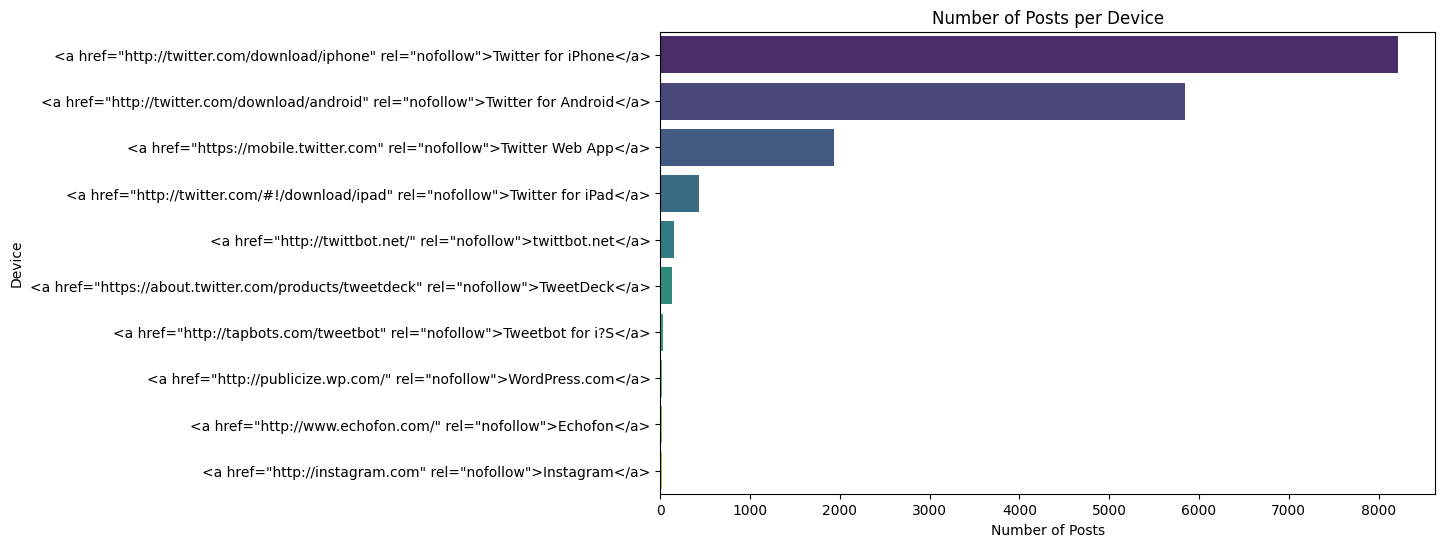

In [10]:
#Chart 1
plt.figure(figsize=(10, 6))
device_counts = df['source'].value_counts().head(10)
sns.barplot(x=device_counts, y=device_counts.index, palette='viridis')
plt.title('Number of Posts per Device')
plt.xlabel('Number of Posts')
plt.ylabel('Device')
plt.show()

<ipython-input-11-e7724476865d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_engagement', y='text', data=top_posts, palette='muted')


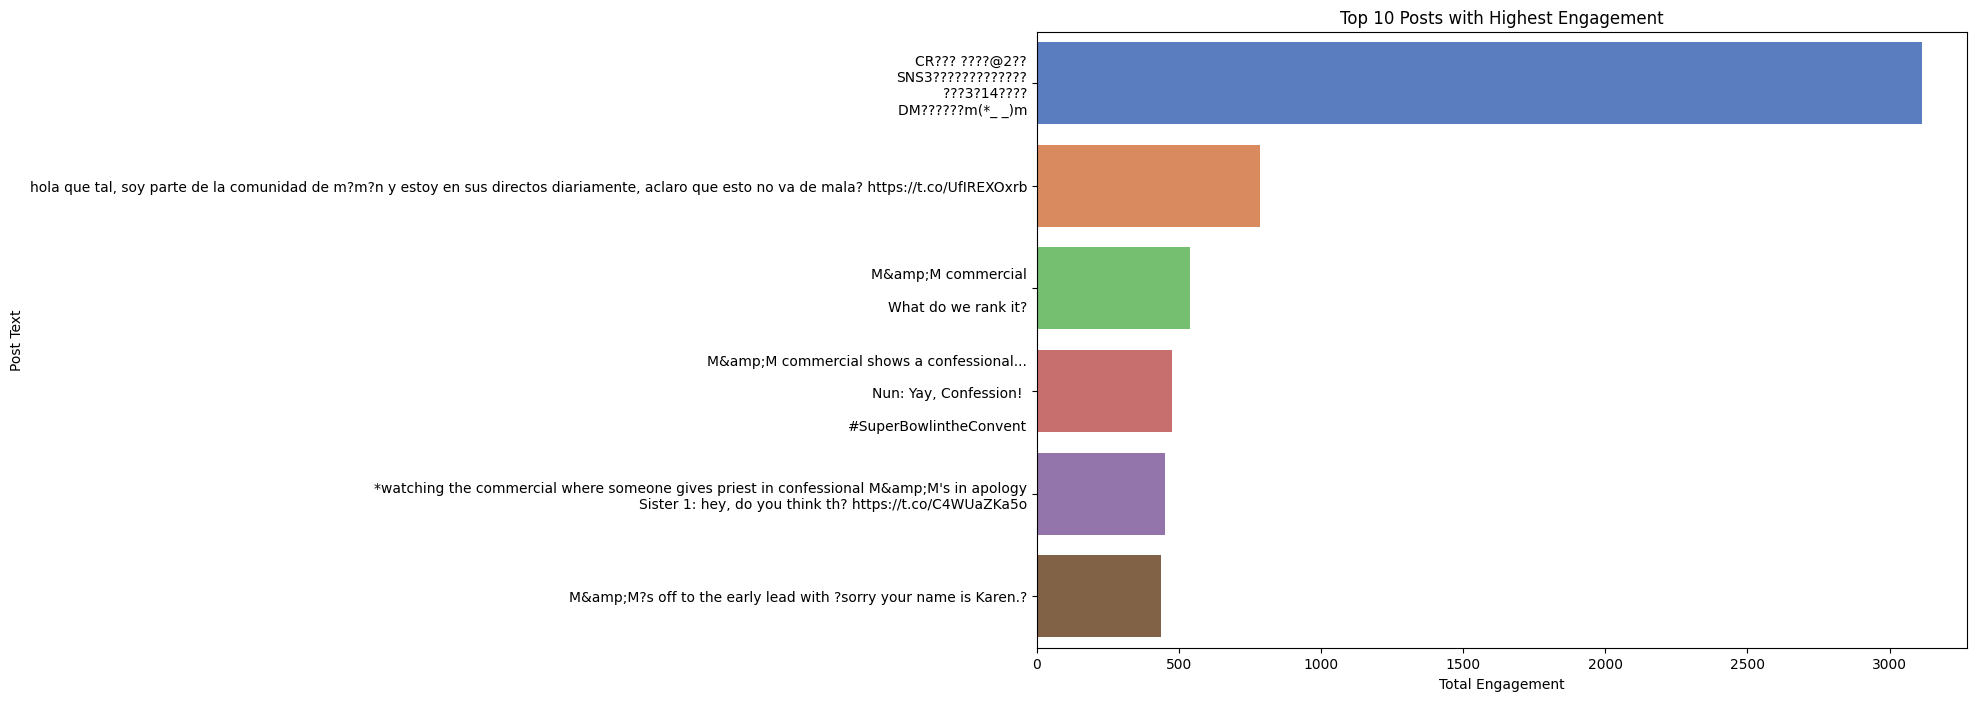

In [11]:
#Chart 2
df['total_engagement'] = df['quote_count'] + df['reply_count'] + df['retweet_count'] + df['favorite_count']
top_posts = df.nlargest(10, 'total_engagement')
plt.figure(figsize=(12, 8))
sns.barplot(x='total_engagement', y='text', data=top_posts, palette='muted')
plt.title('Top 10 Posts with Highest Engagement')
plt.xlabel('Total Engagement')
plt.ylabel('Post Text')
plt.show()


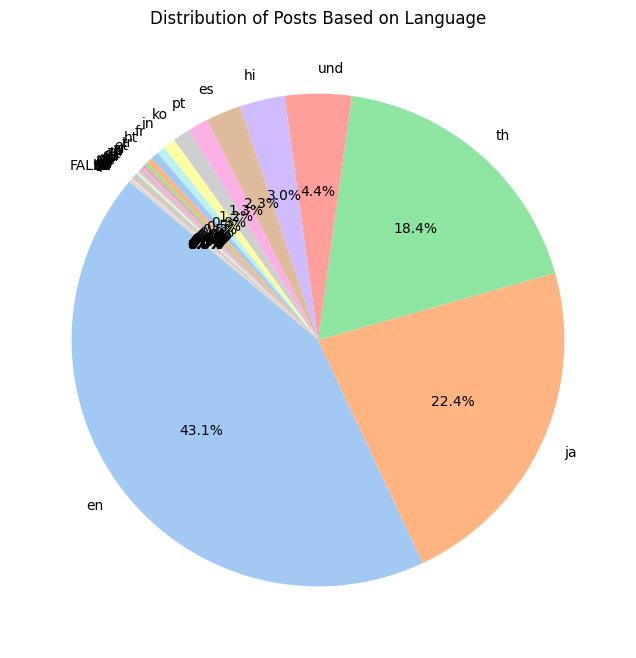

In [12]:
#Chart 3
plt.figure(figsize=(8, 8))
lang_counts = df['lang'].value_counts()
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Posts Based on Language')
plt.show()